# A1 Data Curation

## Step1: Data Acquisition

In [1]:
# Import packages that will be used in this assignment
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


To get the monthly traffic data on English Wikipedia from January 2008 through September 2017, we need to use 2 API endpoints, the Pagecounts API and the Pageviews API. The Pagecounts API provides monthy desktop and mobile traffic data from January 2008 through July 2016, and the Pageviews API provides monthy desktop, mobile-web, and mobile-app traffic data from July 2015 through September 2017. Once the user finishes the parameter settings for the API request, the traffic data will be returned in JSON format. The codes below will get you all pagecounts for English Wikipedia accessed through desktop from January 2008 through July 2016.

In [2]:
# Collect desktop traffic data from January 2008 through July 2016 using the Pagecounts API
endpoint_pagecounts = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

params_pc_desktop = {
                    'project' : 'en.wikipedia.org',
                    'access' : 'desktop-site',
                    'granularity' : 'monthly',
                    'start' : '2008010100',
                    'end' : '2016080100'#use the first day of the following month to ensure a full month of data is collected
                    }

api_call = requests.get(endpoint_pagecounts.format(**params_pc_desktop))
response_pc_desktop = api_call.json()
with open('pagecounts_desktop-site_200801-201607.json', 'w') as outfile:
    json.dump(response_pc_desktop, outfile)


The codes below will get you all pagecounts for English Wikipedia accessed through mobile from January 2008 through July 2016.

In [3]:
# Collect mobile traffic data from January 2008 through July 2016 using the Pagecounts API
endpoint_pagecounts = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access}/{granularity}/{start}/{end}'

params_pc_mobile = {
                    'project' : 'en.wikipedia.org',
                    'access' : 'mobile-site',
                    'granularity' : 'monthly',
                    'start' : '2008010100',
                    'end' : '2016080100'
                    }

api_call = requests.get(endpoint_pagecounts.format(**params_pc_mobile))
response_pc_mobile = api_call.json()
with open('pagecounts_mobile-site_200801-201607.json', 'w') as outfile:
    json.dump(response_pc_mobile, outfile)


The codes below will get you all pageviews for English Wikipedia accessed through desktop from July 2015 through September 2017. Note that the data doesn't count traffic by web crawlers or spiders.

In [4]:
# Collect desktop traffic data from July 2015 through September 2017 using the Pageviews API
endPoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers = {'User-Agent' : 'https://github.com/HWNi', 'From' : 'haowen2@uw.edu'}

params_pv_desktop = {
        'project' : 'en.wikipedia.org',
        'access' : 'desktop',
        'agent' : 'user',
        'granularity' : 'monthly',
        'start' : '2015070100',
        'end' : '2017100100'
        }

api_call = requests.get(endPoint_pageviews.format(**params_pv_desktop))
response_pv_desktop = api_call.json()
with open('pageviews_desktop_201507-201709.json', 'w') as outfile:
    json.dump(response_pv_desktop, outfile)


The codes below will get you all pageviews for English Wikipedia accessed through mobile website from July 2015 through September 2017. Again, note that the data doesn't count traffic by web crawlers or spiders.

In [5]:
# Collect mobile web traffic data from July 2015 through September 2017 using the Pageviews API
endPoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers = {'User-Agent' : 'https://github.com/HWNi', 'From' : 'haowen2@uw.edu'}

params_pv_mobile_web = {
        'project' : 'en.wikipedia.org',
        'access' : 'mobile-web',
        'agent' : 'user',
        'granularity' : 'monthly',
        'start' : '2015070100',
        'end' : '2017100100'
        }

api_call = requests.get(endPoint_pageviews.format(**params_pv_mobile_web))
response_pv_mobile_web = api_call.json()
with open('pageviews_mobile-web_201507-201709.json', 'w') as outfile:
    json.dump(response_pv_mobile_web, outfile)


The codes below will get you all pageviews for English Wikipedia accessed through mobile app from July 2015 through September 2017. Again, note that the data doesn't count traffic by web crawlers or spiders.

In [6]:
# Collect mobile app traffic data from July 2015 through September 2017 using the Pageviews API
endPoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

headers = {'User-Agent' : 'https://github.com/HWNi', 'From' : 'haowen2@uw.edu'}

params_pv_mobile_app = {
        'project' : 'en.wikipedia.org',
        'access' : 'mobile-app',
        'agent' : 'user',
        'granularity' : 'monthly',
        'start' : '2015070100',
        'end' : '2017100100'
        }

api_call = requests.get(endPoint_pageviews.format(**params_pv_mobile_app))
response_pv_mobile_app = api_call.json()
with open('pageviews_mobile-app_201507-201709.json', 'w') as outfile:
    json.dump(response_pv_mobile_app, outfile)


## Step 2: Data processing

Now, we have 5 JSON files containing the traffic data we're interested in. In this step, we first iterate these 5 JSON files one by one and combine the data into a Python dictionary. Eventually, the key of the dictionary will be the list of time stamps (from January 2008 to September 2017). For each key (time stamp), we will append a list which contains 5 values: pagecounts accessed through desktop, pagecounts accessed through mobile, pageviews accessed through desktop, pageviews accessed through mobile web, and pageviews accessed through mobile app.   

In [7]:
data_cleaned = {}

for item in response_pc_desktop['items']:
    timeStamp = item['timestamp']
    data_cleaned[timeStamp] = [item['count'], 0, 0, 0, 0]
        
for item in response_pc_mobile['items']:
    timeStamp = item['timestamp']
    if timeStamp in data_cleaned:
        data_cleaned[timeStamp][1] = item['count'] 
    else:
        data_cleaned[timeStamp] = [0, item['count'], 0, 0, 0]
    
for item in response_pv_desktop['items']:
    timeStamp = item['timestamp']
    if timeStamp in data_cleaned:
        data_cleaned[timeStamp][2] = item['views'] 
    else:
        data_cleaned[timeStamp] = [0, 0, item['views'], 0, 0]
        
for item in response_pv_mobile_web['items']:
    timeStamp = item['timestamp']
    if timeStamp in data_cleaned:
        data_cleaned[timeStamp][3] = item['views'] 
    else:
        data_cleaned[timeStamp] = [0, 0, 0, item['views'], 0]
        
for item in response_pv_mobile_app['items']:
    timeStamp = item['timestamp']
    if timeStamp in data_cleaned:
        data_cleaned[timeStamp][4] = item['views'] 
    else:
        data_cleaned[timeStamp] = [0, 0, 0, 0, item['views']]

After we get the dictionary, we could convert it into a Pandas dataframe and save the dataframe to a csv file

In [8]:
df = pd.DataFrame.from_dict(data_cleaned,  orient='index')
df_result = pd.DataFrame
df['timestamp'] = df.index
df['year'] = [t[0:4] for t in df['timestamp']]
df['month'] = [t[4:6] for t in df['timestamp']]
df['pagecount_all_views'] = df[0] + df[1]
df['pagecount_desktop_views'] = df[0]
df['pagecount_mobile_views'] = df[1]
df['pageview_all_views'] = df[2] + df[3] + df[4]
df['pageview_desktop_views'] = df[2]
df['pageview_mobile_views'] = df[3] + df[4]
df = df.loc[:, 'year' : 'pageview_mobile_views']
df.to_csv('en-wikipedia_traffic_200801-201709.csv', index=False)
df

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
2008010100,2008,01,4930902570,4930902570,0,0,0,0
2008020100,2008,02,4818393763,4818393763,0,0,0,0
2008030100,2008,03,4955405809,4955405809,0,0,0,0
2008040100,2008,04,5159162183,5159162183,0,0,0,0
2008050100,2008,05,5584691092,5584691092,0,0,0,0
2008060100,2008,06,5712104279,5712104279,0,0,0,0
2008070100,2008,07,5306302874,5306302874,0,0,0,0
2008080100,2008,08,5140155519,5140155519,0,0,0,0
2008090100,2008,09,5479533823,5479533823,0,0,0,0
2008100100,2008,10,5679440782,5679440782,0,0,0,0


# Step 3: Analysis

In the final step, we make a time series plot for the data we processed before. The X-axis of the plot will be a date range, and Y-axis of the plot will be the amount of traffic times 1 million(The author downscaled the traffic data by 1 million).

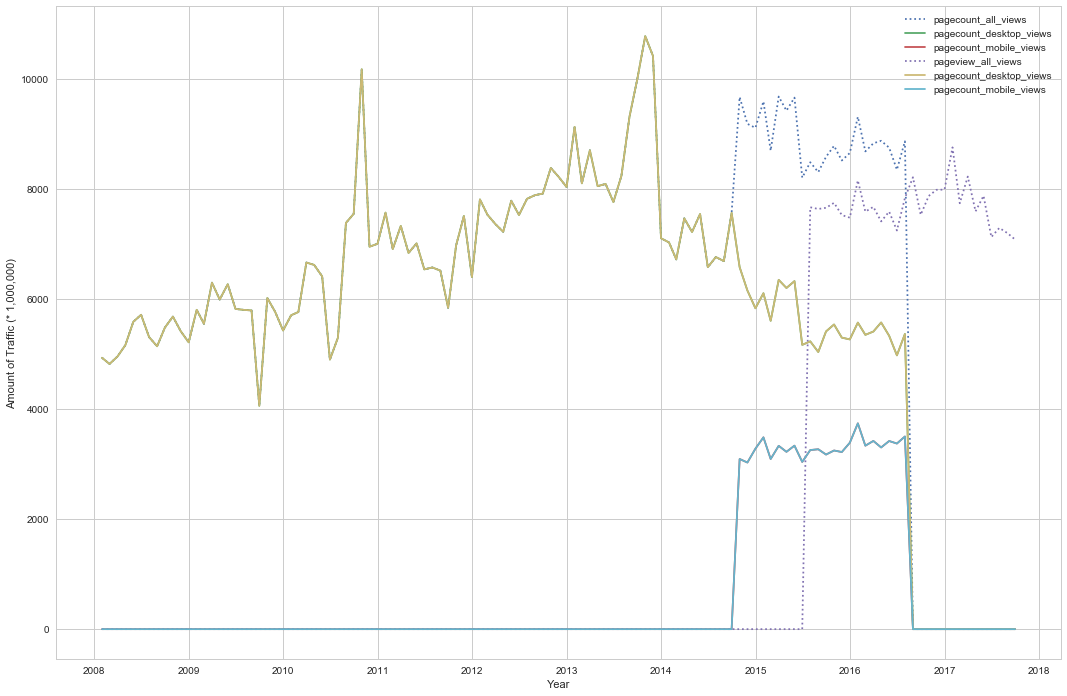

In [9]:
dateRange = pd.date_range('2008-01', '2017-10', freq='M')
scale = 1e-6
sns.set_style("whitegrid")
fig = plt.figure(figsize=(18, 12))
plt.plot(dateRange, df['pagecount_all_views'] * scale, linestyle = ':')
plt.plot(dateRange, df['pagecount_desktop_views'] * scale)
plt.plot(dateRange, df['pagecount_mobile_views'] * scale)
plt.plot(dateRange, df['pageview_all_views'] * scale, linestyle = ':')
plt.plot(dateRange, df['pagecount_desktop_views'] * scale)
plt.plot(dateRange, df['pagecount_mobile_views'] * scale)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Amount of Traffic (* 1,000,000)')
fig.savefig('en-wikipedia_traffic_200801-201709.jpg')